In [1]:
#Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## CNN with two Convolution layers Without Data Augumentation

In [2]:
train_datagen_with_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True)
train_datagen_with_no_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)

In [3]:
train_generator = train_datagen_with_no_transforms.flow_from_directory(
    r'E:\SEM-5_FALL_21-22\Machine Intelligence in Medical Analysis_CSE3042\ALZEIMERS DETECTION\Alzheimers-ADNI\train',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
train_generator_with_data_augmentation = train_datagen_with_transforms.flow_from_directory(
    r'E:\SEM-5_FALL_21-22\Machine Intelligence in Medical Analysis_CSE3042\ALZEIMERS DETECTION\Alzheimers-ADNI\train',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
validation_generator = val_datagen.flow_from_directory(
    r'E:\SEM-5_FALL_21-22\Machine Intelligence in Medical Analysis_CSE3042\ALZEIMERS DETECTION\Alzheimers-ADNI\test',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)

Found 1101 images belonging to 5 classes.
Found 1101 images belonging to 5 classes.
Found 195 images belonging to 5 classes.


In [4]:
sample_data = next(validation_generator)

In [5]:
sample_data[0].shape

(32, 32, 32, 3)

In [6]:
nb_train_samples = train_generator.samples
nb_val_samples = validation_generator.samples

In [7]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [10]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_generator, steps_per_epoch=nb_train_samples/32, 
                    epochs=30, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

C:\Users\reddy\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 [==============================] - 5s 137ms/step - loss: 1.4863 - accuracy: 0.4305 - val_loss: 1.4576 - val_accuracy: 0.4462
Epoch 2/30
34/34 [==============================] - 5s 129ms/step - loss: 1.3839 - accuracy: 0.4587 - val_loss: 1.3997 - val_accuracy: 0.4410
Epoch 3/30
34/34 [==============================] - 5s 138ms/step - loss: 1.2584 - accuracy: 0.5005 - val_loss: 1.4183 - val_accuracy: 0.4564
Epoch 4/30
34/34 [==============================] - 4s 127ms/step - loss: 1.1152 - accuracy: 0.5713 - val_loss: 1.5030 - val_accuracy: 0.4410
Epoch 5/30
34/34 [==============================] - 7s 201ms/step - loss: 0.9660 - accuracy: 0.6058 - val_loss: 1.4790 - val_accuracy: 0.4051
Epoch 6/30
34/34 [==============================] - 6s 177ms/step - loss: 0.8026 - accuracy: 0.6939 - val_loss: 1.5432 - val_accuracy: 0.3846
Epoch 7/30
34/34 [==============================] - 5s 157ms/step - loss: 0.6613 - accuracy: 0.7602 - val_loss: 1.5944 - val_accuracy: 0.3897
Epoch 

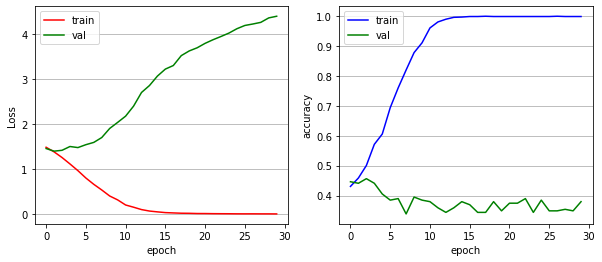

In [12]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_no_dropout")

## CNN with two Convolution layers  With Data Augumentation

In [13]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [16]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/32, 
                    epochs=30,validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Epoch 1/30
34/34 [==============================] - 8s 228ms/step - loss: 1.5592 - accuracy: 0.3933 - val_loss: 1.4407 - val_accuracy: 0.4308
Epoch 2/30
34/34 [==============================] - 6s 159ms/step - loss: 1.4276 - accuracy: 0.4405 - val_loss: 1.4555 - val_accuracy: 0.3795
Epoch 3/30
34/34 [==============================] - 7s 215ms/step - loss: 1.4136 - accuracy: 0.4469 - val_loss: 1.4198 - val_accuracy: 0.4667
Epoch 4/30
34/34 [==============================] - 7s 198ms/step - loss: 1.4083 - accuracy: 0.4332 - val_loss: 1.4195 - val_accuracy: 0.4410
Epoch 5/30
34/34 [==============================] - 5s 134ms/step - loss: 1.3974 - accuracy: 0.4342 - val_loss: 1.4096 - val_accuracy: 0.4667
Epoch 6/30
34/34 [==============================] - 5s 146ms/step - loss: 1.3686 - accuracy: 0.4505 - val_loss: 1.3971 - val_accuracy: 0.4513
Epoch 7/30
34/34 [==============================] - 5s 153ms/step - loss: 1.3467 - accuracy: 0.4632 - val_loss: 1.3918 - val_accuracy: 0.4821
Epoch 

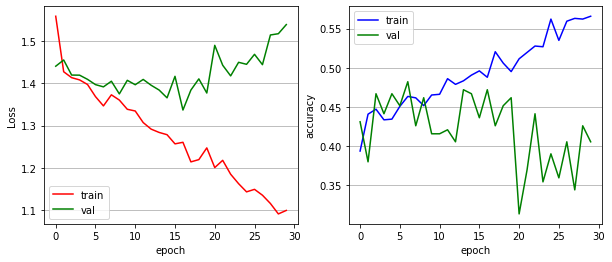

In [18]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_data_augmentation")

## CNN with Maxpooling layers Without Data Augumentation

In [19]:
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

In [20]:
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [21]:
history = model2.fit_generator(train_generator, steps_per_epoch=nb_train_samples/32, 
                    epochs=30, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Epoch 1/30
34/34 [==============================] - 5s 110ms/step - loss: 1.5309 - accuracy: 0.4160 - val_loss: 1.5476 - val_accuracy: 0.4462
Epoch 2/30
34/34 [==============================] - 4s 106ms/step - loss: 1.4317 - accuracy: 0.4414 - val_loss: 1.4025 - val_accuracy: 0.4462
Epoch 3/30
34/34 [==============================] - 4s 105ms/step - loss: 1.3948 - accuracy: 0.4478 - val_loss: 1.3997 - val_accuracy: 0.4462
Epoch 4/30
34/34 [==============================] - 4s 110ms/step - loss: 1.3672 - accuracy: 0.4505 - val_loss: 1.4134 - val_accuracy: 0.4513
Epoch 5/30
34/34 [==============================] - 5s 150ms/step - loss: 1.3338 - accuracy: 0.4732 - val_loss: 1.4178 - val_accuracy: 0.4513
Epoch 6/30
34/34 [==============================] - 4s 120ms/step - loss: 1.2769 - accuracy: 0.4905 - val_loss: 1.3909 - val_accuracy: 0.4154
Epoch 7/30
34/34 [==============================] - 4s 120ms/step - loss: 1.2476 - accuracy: 0.5286 - val_loss: 1.3768 - val_accuracy: 0.4769
Epoch 

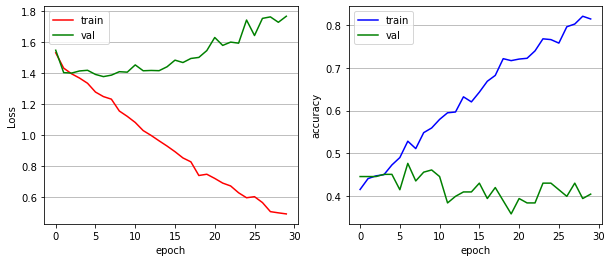

In [22]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with0_dropout_maxpool")

## CNN with Maxpooling layers With Data Augumentation

In [23]:
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

In [24]:
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [25]:
history = model2.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/32, 
                    epochs=30, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Epoch 1/30
34/34 [==============================] - 5s 139ms/step - loss: 1.5832 - accuracy: 0.3742 - val_loss: 1.4356 - val_accuracy: 0.4462
Epoch 2/30
34/34 [==============================] - 4s 125ms/step - loss: 1.4239 - accuracy: 0.4478 - val_loss: 1.4372 - val_accuracy: 0.4308
Epoch 3/30
34/34 [==============================] - 4s 123ms/step - loss: 1.4176 - accuracy: 0.4487 - val_loss: 1.4152 - val_accuracy: 0.4462
Epoch 4/30
34/34 [==============================] - 4s 126ms/step - loss: 1.4081 - accuracy: 0.4460 - val_loss: 1.4153 - val_accuracy: 0.4462
Epoch 5/30
34/34 [==============================] - 4s 122ms/step - loss: 1.4103 - accuracy: 0.4432 - val_loss: 1.4109 - val_accuracy: 0.4462
Epoch 6/30
34/34 [==============================] - 4s 126ms/step - loss: 1.4108 - accuracy: 0.4478 - val_loss: 1.4127 - val_accuracy: 0.4462
Epoch 7/30
34/34 [==============================] - 4s 126ms/step - loss: 1.3983 - accuracy: 0.4496 - val_loss: 1.4012 - val_accuracy: 0.4462
Epoch 